In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import scipy.io
import pandas as pd
from skimage import color
from skimage import io
import math
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
ctScans = scipy.io.loadmat('/content/drive/My Drive/CCE-AIMIA/ctscan_hw1.mat')
ctMasks = scipy.io.loadmat('/content/drive/My Drive/CCE-AIMIA/infmsk_hw1.mat')

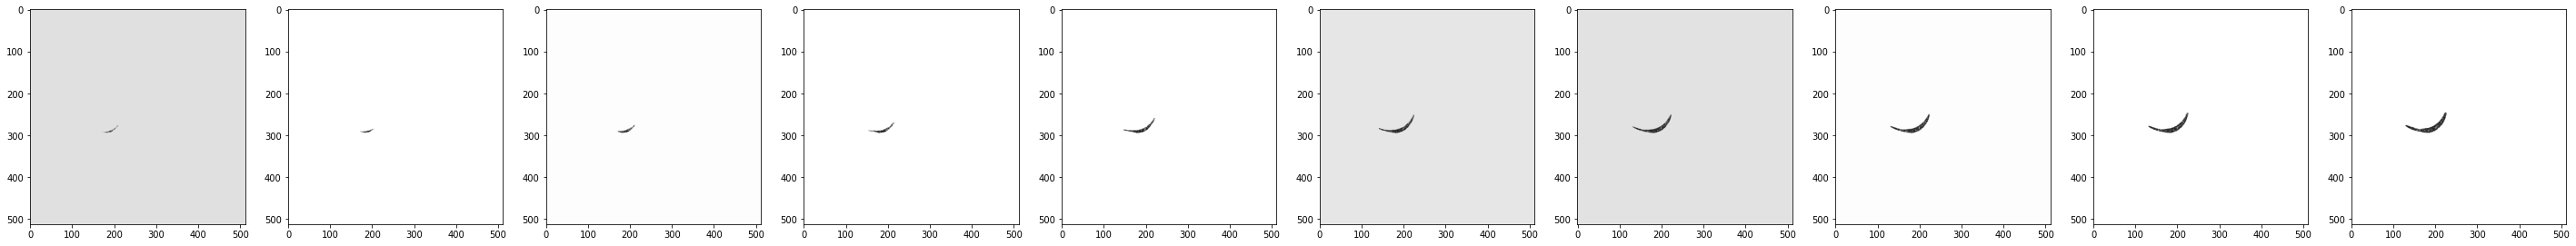

In [ ]:
fig, axis = plt.subplots(1, 10, figsize=(50, 50))
for i in range(0,10):
  #axis[i] = (ctScans['ctscan'][:,:,i])
  axis[i].imshow((ctScans['ctscan'][:,:,i]),cmap="gray")
  #plt.imshow(axs[i],cmap="gray",vmin=0, vmax=255, origin=(0,0))

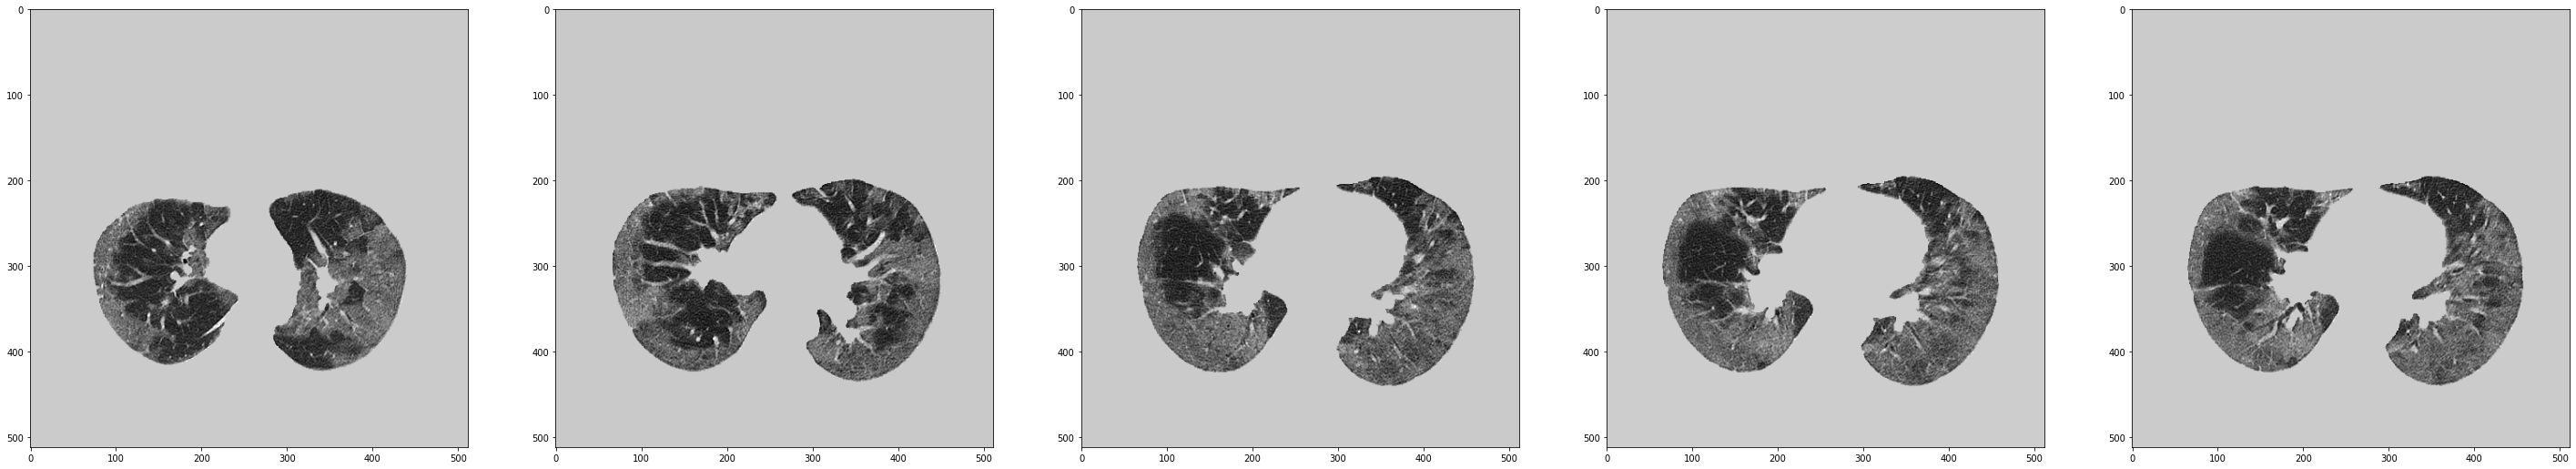

In [ ]:
fig, axis = plt.subplots(1, 5, figsize=(50, 50))
axis[0].imshow((ctScans['ctscan'][:,:,3531]), cmap ="gray")
axis[1].imshow((ctScans['ctscan'][:,:,3522]), cmap ="gray")
axis[2].imshow((ctScans['ctscan'][:,:,3513]), cmap ="gray")
axis[3].imshow((ctScans['ctscan'][:,:,3514]), cmap ="gray")
axis[4].imshow((ctScans['ctscan'][:,:,3515]), cmap ="gray")

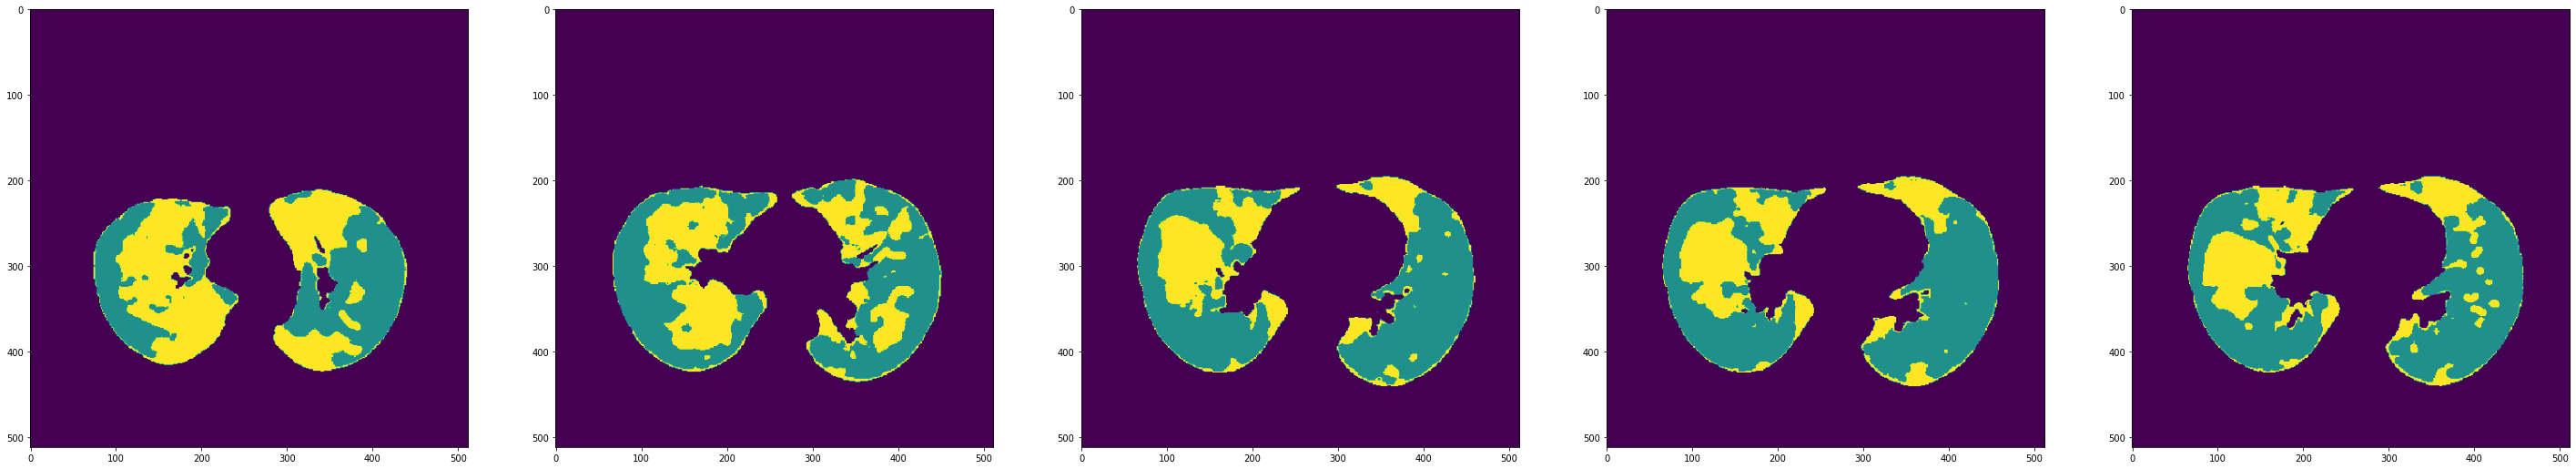

In [ ]:
fig, axis = plt.subplots(1, 5, figsize=(50, 50))
axis[0].imshow(ctMasks['infmsk'][:,:,3531]) #,cmap ="gray")
axis[1].imshow(ctMasks['infmsk'][:,:,3522]) #,cmap ="gray")
axis[2].imshow(ctMasks['infmsk'][:,:,3513]) #,cmap ="gray")
axis[3].imshow(ctMasks['infmsk'][:,:,3514]) #,cmap ="gray")
axis[4].imshow(ctMasks['infmsk'][:,:,3515]) #,cmap ="gray")

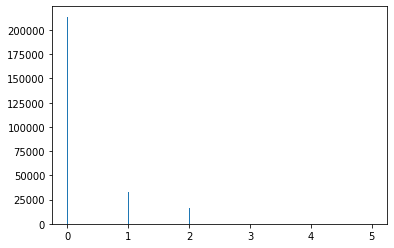

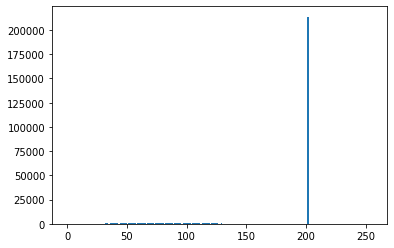

In [ ]:
#Historgram Test
img1 = ctMasks['infmsk'][:,:,3513]
img2 = ctScans['ctscan'][:,:,3513]
#plt.hist(img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k') #calculating histogram
plt.hist(img1.ravel(),256,[0,5])
plt.show()
plt.hist(img2.ravel(),256,[0,255])
plt.show()

In [ ]:
(ms,ns,cs)= (ctScans['ctscan']).shape
(mm,nm,cm)= (ctMasks['infmsk']).shape
print((ms,ns,cs))
print((mm,nm,cm))

(512, 512, 3554)
(512, 512, 3554)


In [ ]:
ctscansarray = []
ctmasksarray = []
for i in range(cm):
    ctscansarray.append((ctScans['ctscan'][:,:,i]))
    ctmasksarray.append((ctMasks['infmsk'][:,:,i]))

In [ ]:
ctmasksHealthy = []
ctmasksInfected = []
Percentage_infection = []
for i in range(len(ctmasksarray)):
  ctmasksHealthy.append(np.sum((ctmasksarray[i])==2))
  ctmasksInfected.append(np.sum((ctmasksarray[i])==1))
  Percentage_infection.append((ctmasksInfected[i]/(ctmasksHealthy[i]+ctmasksInfected[i])) *100)

In [ ]:
SevereInfCT = []
MildInfCT = []
NormalCT = []
for i in range(len(Percentage_infection)):
  if(Percentage_infection[i] >= 40):
    SevereInfCT.append(Percentage_infection[i])
  elif((Percentage_infection[i] > 0 ) and (Percentage_infection[i] < 40 )):
    MildInfCT.append(Percentage_infection[i])
  else:
    NormalCT.append(Percentage_infection[i])

145
The Infection rate is 63.052277847787074 percent it is Severe infected CT Slice!!!


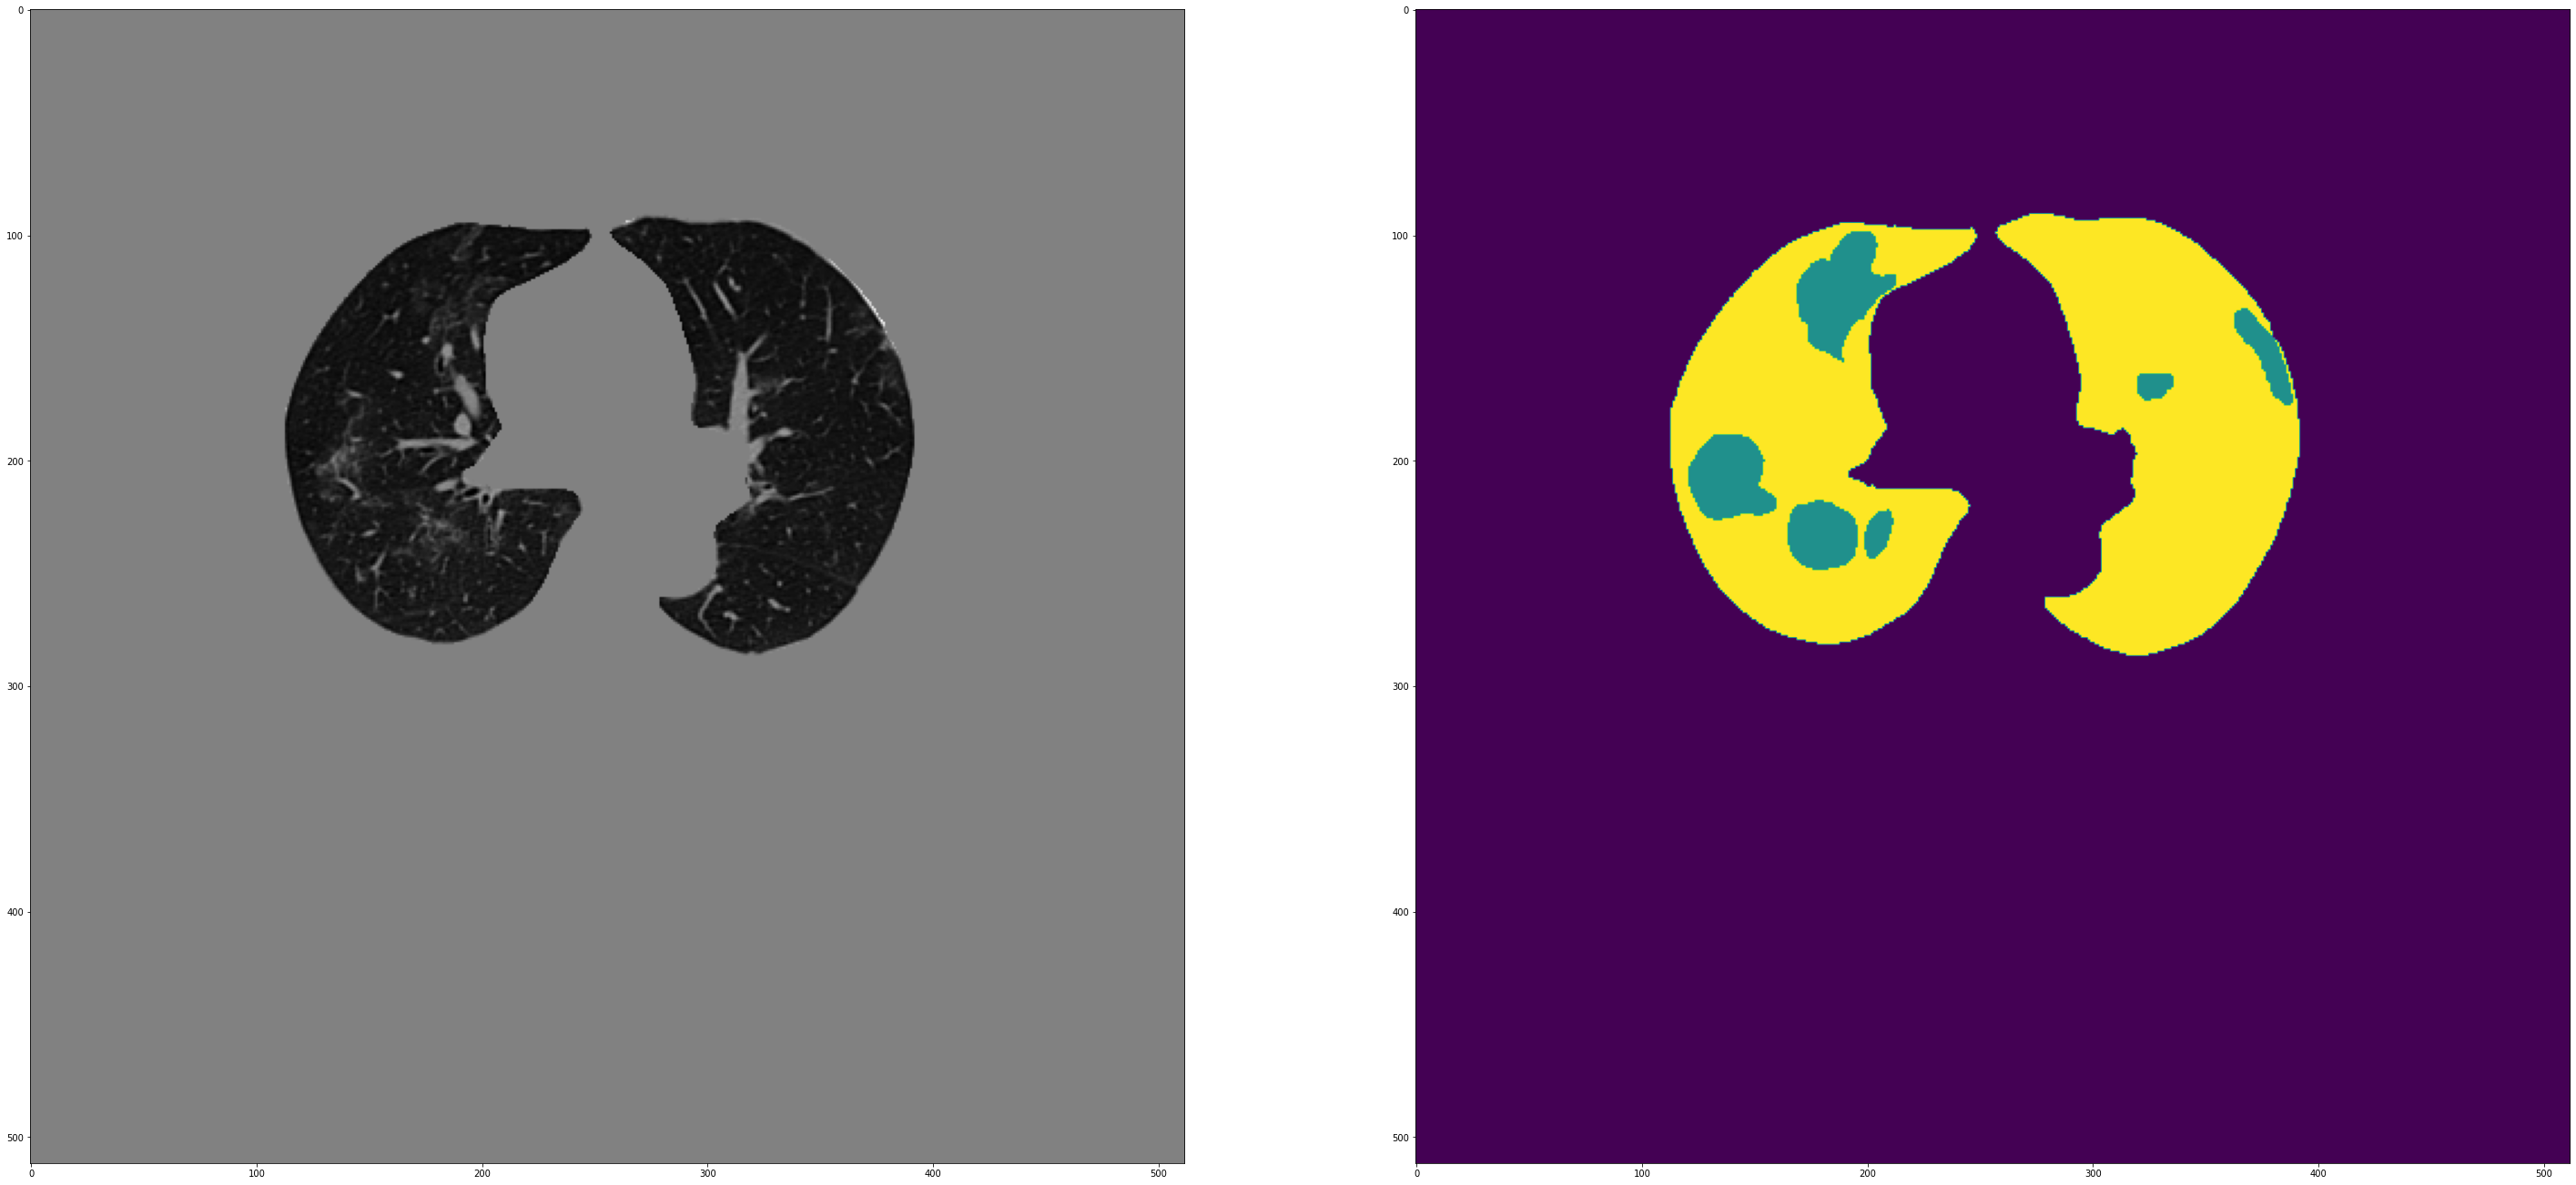

In [ ]:
num1 = np.random.randint(0, len(SevereInfCT))
print(num1)
fig, axis = plt.subplots(1, 2, figsize=(50, 50))
axis[0].imshow((ctscansarray[num1]),cmap="gray")
axis[1].imshow((ctmasksarray[num1]))#,cmap="gray")
print(f'The Infection rate is {SevereInfCT[num1]} percent it is Severe infected CT Slice!!!')


59
The Infection rate is 15.145356543253513 percent it is Mild infected CT slice!!


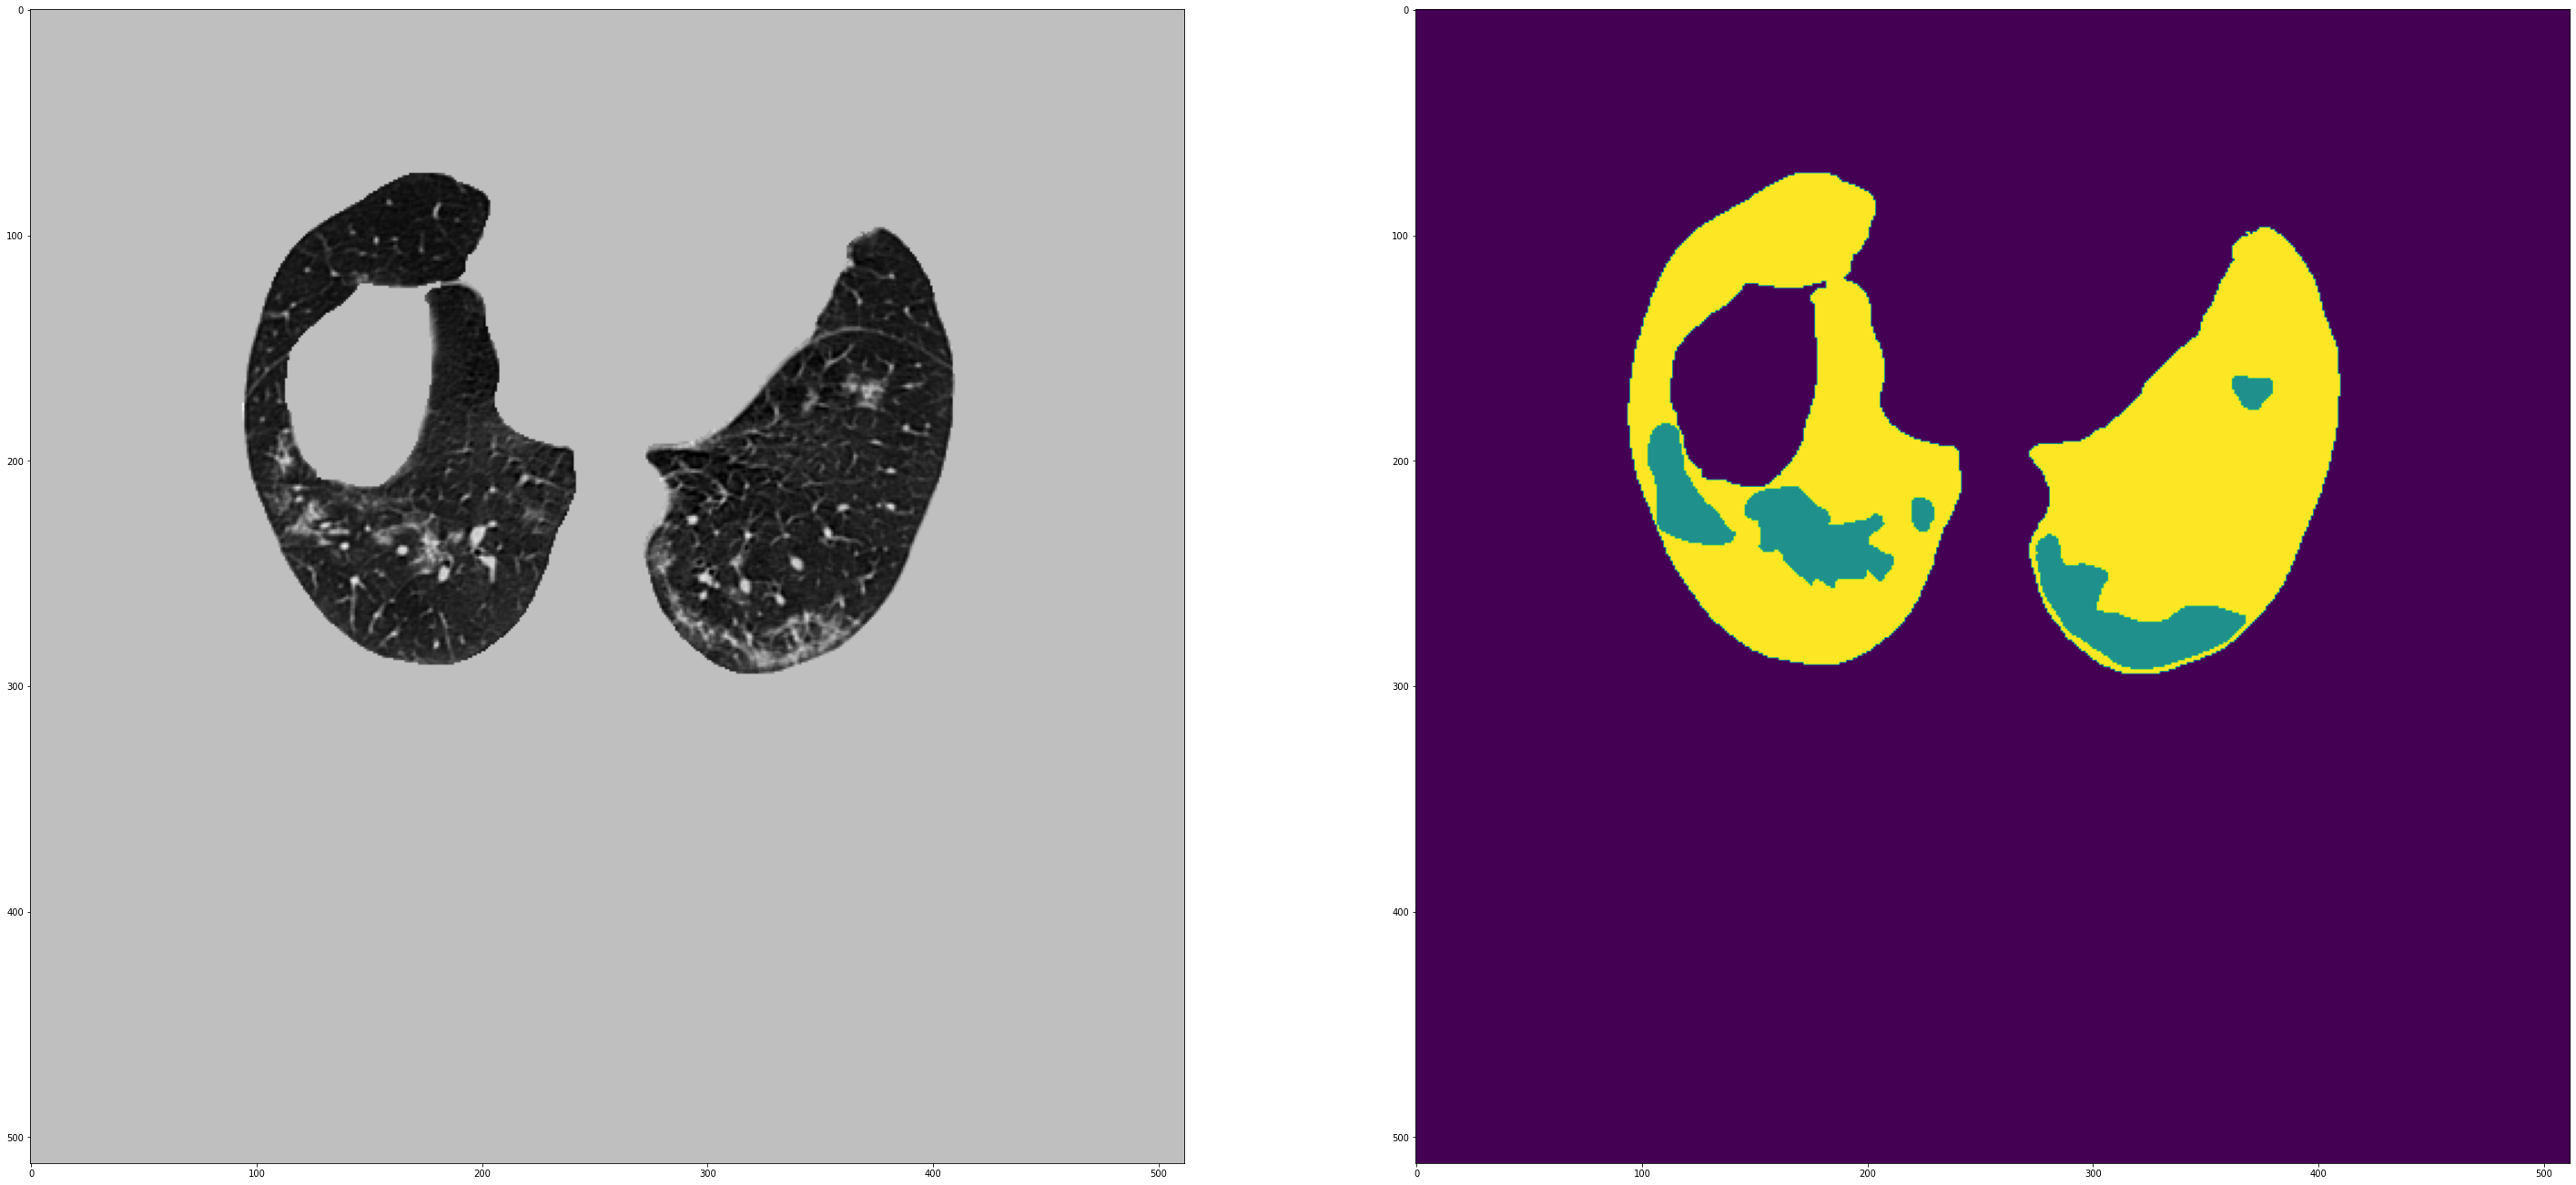

In [ ]:
num2 = np.random.randint(0, len(MildInfCT))
print(num2)
fig, axis = plt.subplots(1, 2, figsize=(50, 50))
axis[0].imshow((ctscansarray[num2]),cmap="gray")
axis[1].imshow((ctmasksarray[num2]))#,cmap="gray")
print(f'The Infection rate is {MildInfCT[num2]} percent it is Mild infected CT slice!!')

291
The Infection rate is 0.0 percent it is Normal CT Slice


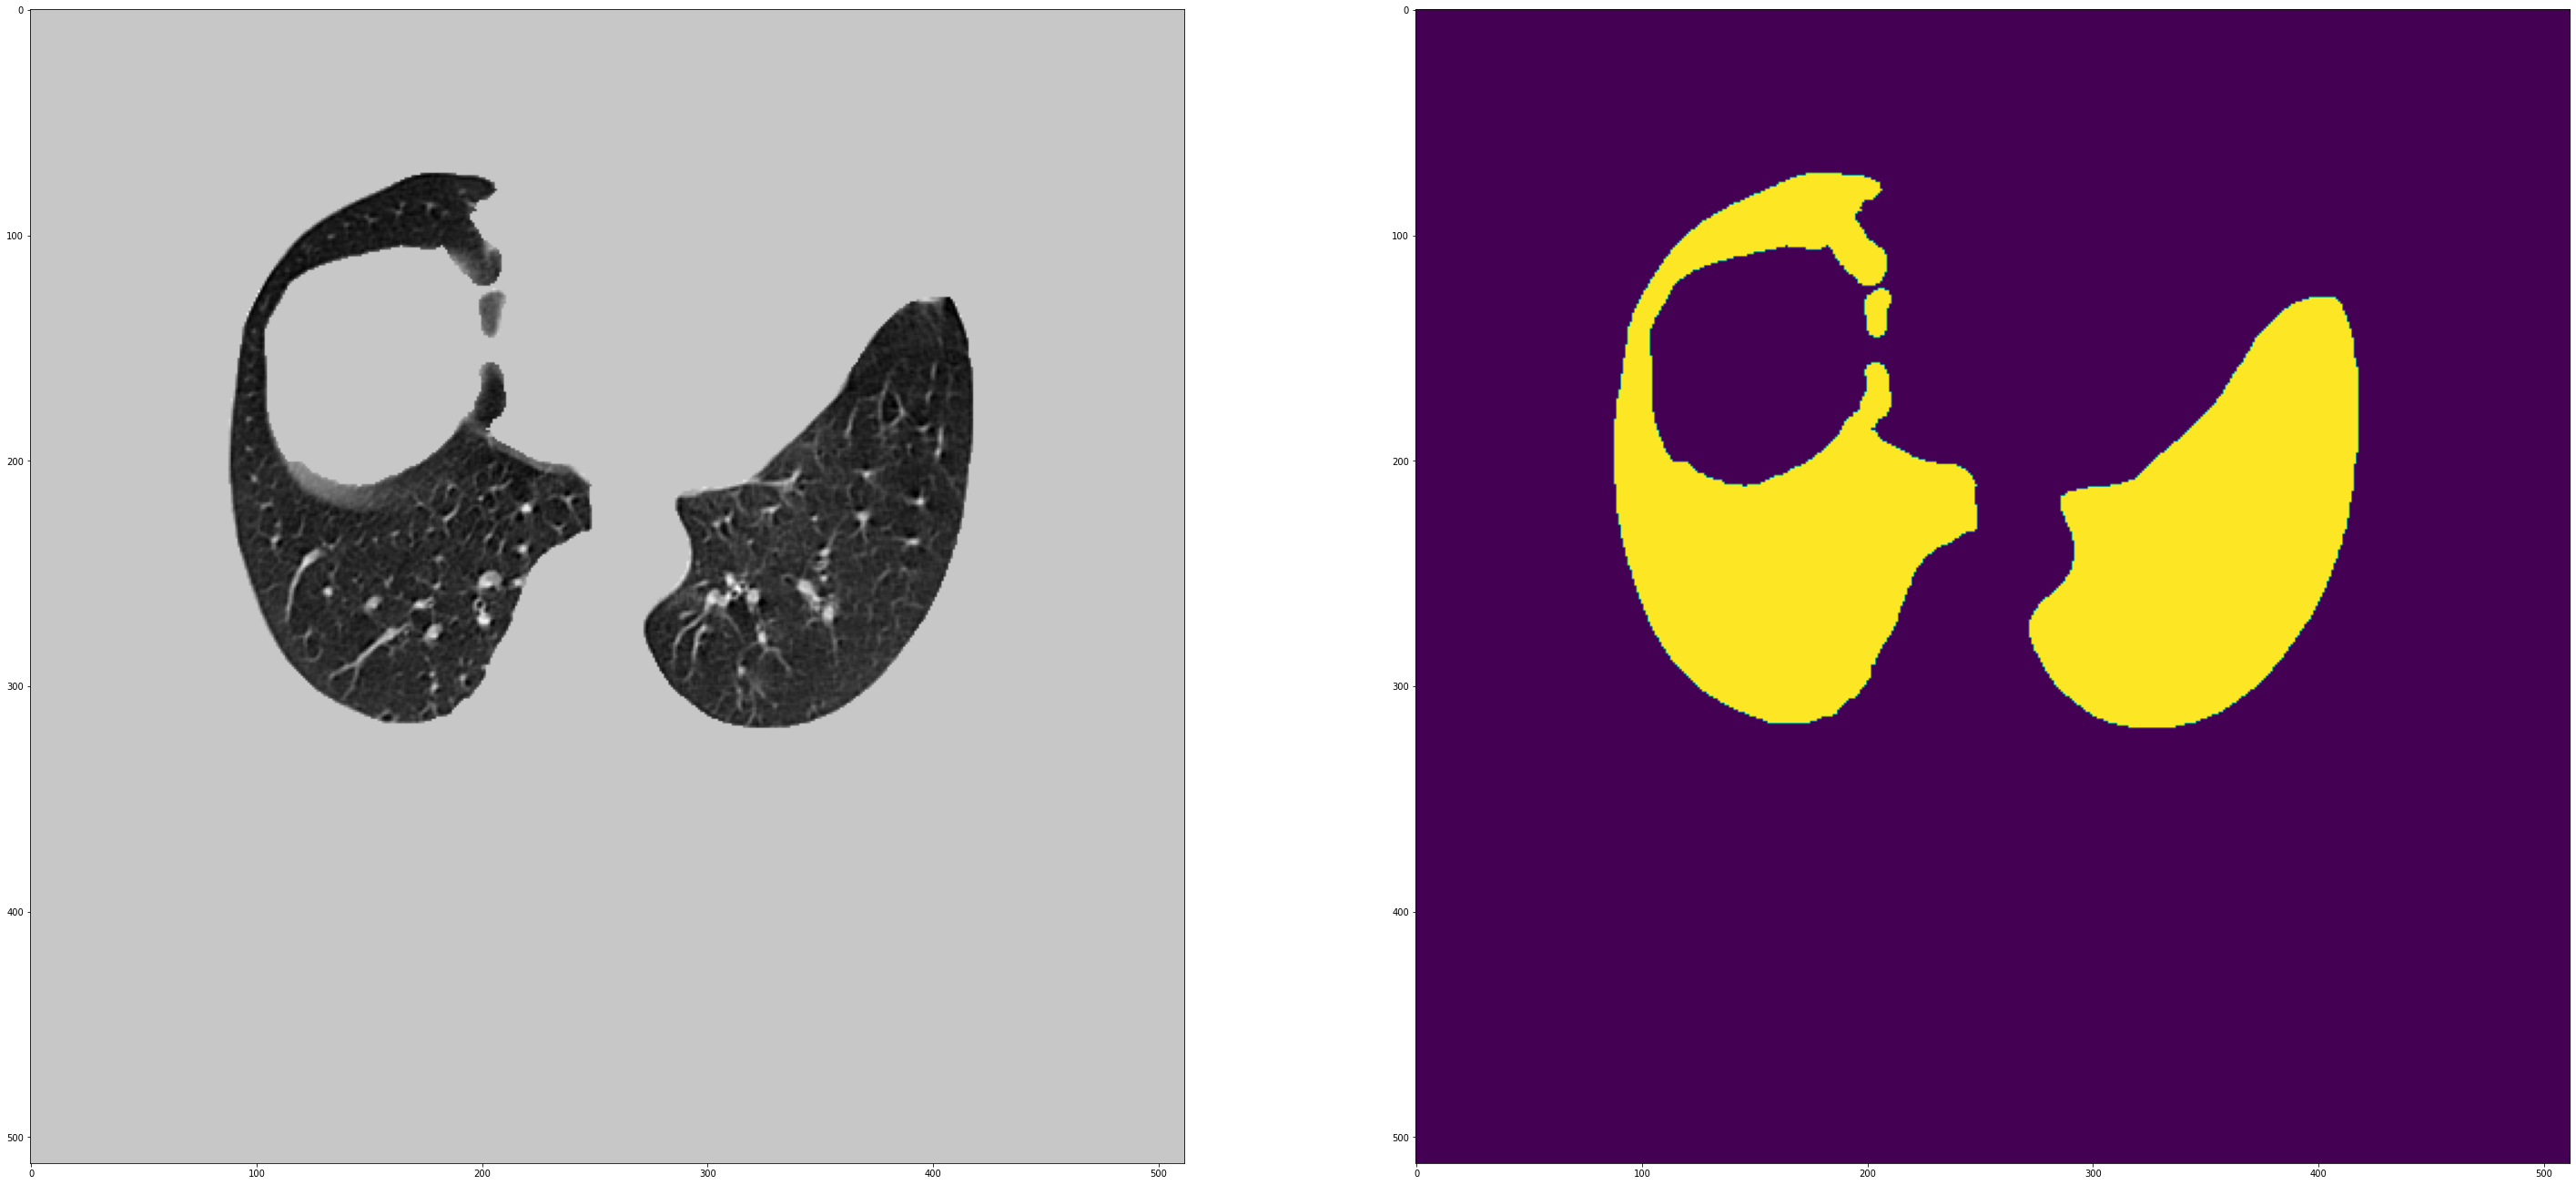

In [ ]:
num3 = np.random.randint(0, len(NormalCT))
print(num3)
fig, axis = plt.subplots(1, 2, figsize=(50, 50))
axis[0].imshow((ctscansarray[num3]),cmap="gray")
axis[1].imshow((ctmasksarray[num3]))#,cmap="gray")
print(f'The Infection rate is {NormalCT[num3]} percent it is Normal CT Slice')

In [ ]:
len(NormalCT)

1441

In [ ]:
#Stats
print(f'The total number of infection masks are equal to {len(Percentage_infection)}')
print(f'Severe infection was found in {len(SevereInfCT)} slices')
print(f'Mild infection was found in {len(MildInfCT)} slices')
print(f'There were {len(NormalCT)} normal slices')

The total number of infection masks are equal to 3554
Severe infection was found in 159 slices
Mild infection was found in 1954 slices
There were 1441 normal slices


In [ ]:
s = (len(SevereInfCT)/len(Percentage_infection))*100
m = (len(MildInfCT)/len(Percentage_infection))*100
n = (len(NormalCT)/len(Percentage_infection))*100
print(f'The total Severe infection rate is {math.ceil(s)}%')
print(f'The total Mild infection rate is {math.ceil(m)}%')
print(f'The total Normal slices rate is {math.ceil(n)}%')

The total Severe infection rate is 5%
The total Mild infection rate is 55%
The total Normal slices rate is 41%


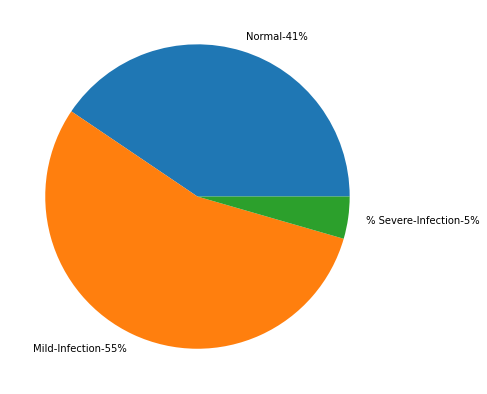

In [ ]:
# Distribution of Categories
CTcategories = ['Normal-41%', 'Mild-Infection-55%', ' % Severe-Infection-5%']
data = [n, m, s]
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = CTcategories)
plt.show()